# Analysis of the Attack on Adult

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
from pathlib import Path
import os
import sys
import bz2
import pickle
np.random.seed(10)
# adds the visibility of the mlem module, needed to load the attack models
sys.path.append("../../../..") 
sys.path.append("../../")
import mlem
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier
import mynbutils as mu
from mlem.utilities import (load_pickle_bz2)

Blackbox data

In [2]:
BLACK_BOX_PATH = './BB_DATA/adult_rf_noclustering.bz2'
BLACK_BOX_DATA_PATH = './BB_DATA/adult_rf_noclustering_data_nsamples_2.npz'
TRAIN_SET_CSV = 'BB_DATA/train.csv'
TEST_SET_CSV  = 'BB_DATA/test.csv'
NOISY_VALIDATION_SET_CSV = 'BB_DATA/validation_noisy.csv'
CENTROIDS_NEIGHBORS = 'BB_DATA/clusters_representatives_quantiles_2_48.csv'

loading the data and the black box

In [3]:
black_box = load_pickle_bz2(BLACK_BOX_PATH)
black_box

RandomForestClassifier(max_depth=100, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=350)

In [4]:
loaded = np.load(BLACK_BOX_DATA_PATH, allow_pickle=True)
for k in loaded.keys():
    print(k, end=" ")
print(f"loaded from {BLACK_BOX_DATA_PATH}")

x_train x_test y_train y_test x_test_clustered y_test_clustered loaded from ./BB_DATA/adult_rf_noclustering_data_nsamples_2.npz


In [5]:
x_train = loaded["x_train"]
x_test = loaded["x_test"]
y_train = loaded["y_train"]
y_test = loaded["y_test"]
x_test_clustered = loaded["x_test_clustered"]
y_test_clustered = loaded["y_test_clustered"]

In [6]:
feat_cols = [
    'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status',
    'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss',
    'Hours-per-week', 'Native-country'
]
adult_train = pd.read_csv(TRAIN_SET_CSV)
adult_test = pd.read_csv(TEST_SET_CSV)
adult_test_subset_cluster = pd.read_csv(CENTROIDS_NEIGHBORS)
print(f"Loaded train and test sets from:\n{TRAIN_SET_CSV}\n{TEST_SET_CSV}")

Loaded train and test sets from:
BB_DATA/train.csv
BB_DATA/test.csv


# Dataset Generated with LIME + OVERSAMPLING 

In [7]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/ADULT_OVERSAMPLING_GENERATED_DATASET/gaussian/gaussian"

### Attack with the Hard Voting Classifier

#even = 4 IN - 0 OUT
Lime-Generated data plus oversampling | HardVoting
              precision    recall  f1-score   support

          in       0.70      0.88      0.78     16873
         out       0.32      0.13      0.19      7234

    accuracy                           0.66     24107
   macro avg       0.51      0.51      0.49     24107
weighted avg       0.59      0.66      0.60     24107



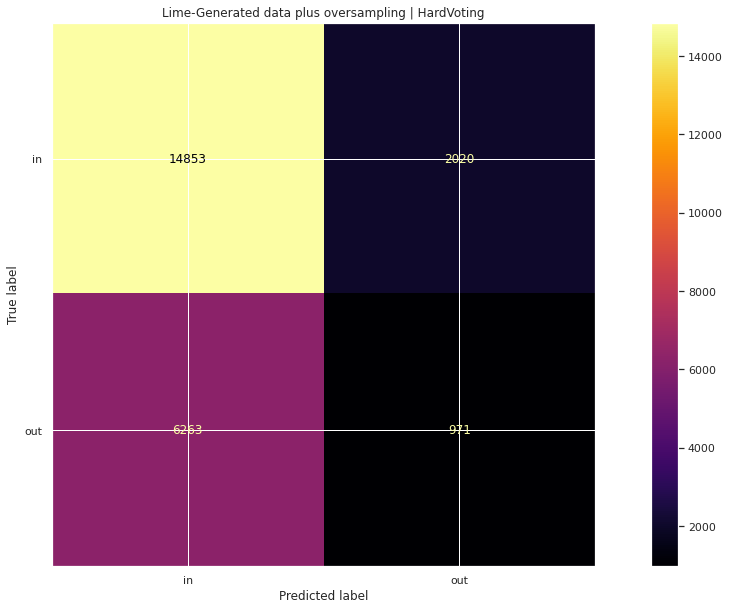

In [8]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(adult_train, adult_test, ensemble_0, ensemble_1, black_box, "Lime-Generated data plus oversampling | HardVoting")

# Attack dataset created by selecting the elements from the noisy set which where close to the centroids of the lime neighborhood

## No oversampling right after creation (on adult already left 5000+)

In [9]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/ADULT_CENTROIDS_LIME_NO_OVERSAMPLING_AFTER_PICKING/gaussian/same"

### Attack with the Hard Voting Classifier

/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#even = 0 IN - 0 OUT
Noisy elem. close to centroids | HardVoting
              precision    recall  f1-score   support

          in       0.70      0.88      0.78     16877
         out       0.33      0.14      0.20      7234

    accuracy                           0.66     24111
   macro avg       0.51      0.51      0.49     24111
weighted avg       0.59      0.66      0.61     24111



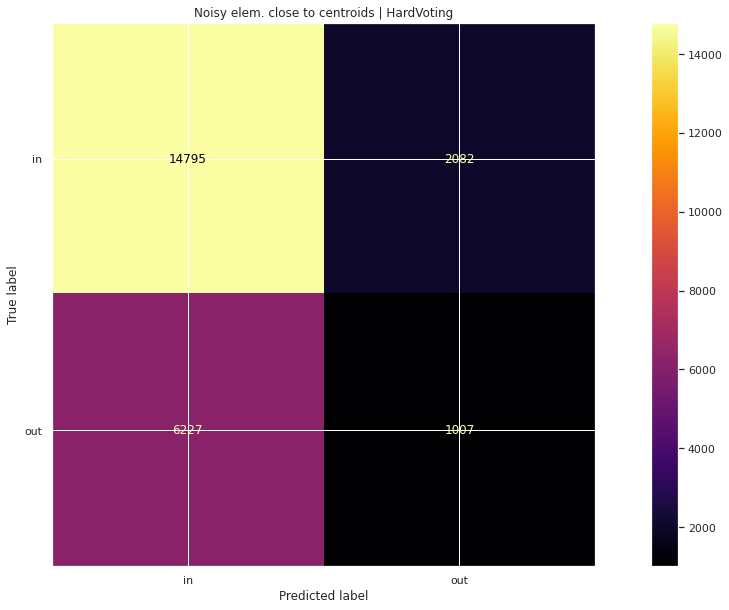

In [10]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(adult_train, adult_test, ensemble_0, ensemble_1, black_box, "Noisy elem. close to centroids | HardVoting")

## With oversampling right after creation (bringing the proportion to 50/50)

In [11]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/ADULT_CENTROIDS_LIME_WITH_OVERSAMPLING_AFTER_PICKING/gaussian/same"

#even = 2 IN - 0 OUT
Noisy elem. close to centroids + overs | HardVoting
              precision    recall  f1-score   support

          in       0.70      0.88      0.78     16875
         out       0.33      0.14      0.20      7234

    accuracy                           0.66     24109
   macro avg       0.51      0.51      0.49     24109
weighted avg       0.59      0.66      0.61     24109



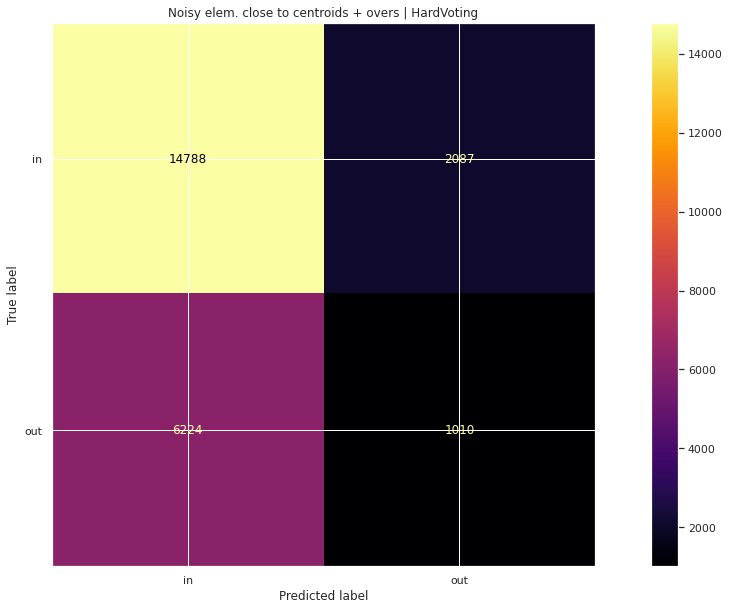

In [12]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(adult_train, adult_test, ensemble_0, ensemble_1, black_box, "Noisy elem. close to centroids + overs | HardVoting")

## With oversampling on the attack dataset

> Ora ho passato l'attack dataset a SMOTE, ma il dataset conteneva delle probabilità.

> TODO: Controllare se SMOTE in questo caso genera anch'esso delle probabilità. Altrimenti posso fare l'oversampling su una sola colonna
>       ed eventualmente creare l'altra come $1-\text{valori generati da SMOTE}$ 

In [13]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/12_AGO/ADULT_CENTROIDS_LIME_WITH_OVERSAMPLING_AFTER_PICKING_AND_ATTACK_OVERS/gaussian/same/"

/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#even = 119 IN - 66 OUT
Noisy elem. close to centroids + overs + overs on attack dataset | HardVoting
              precision    recall  f1-score   support

          in       0.70      0.85      0.77     16758
         out       0.32      0.16      0.22      7168

    accuracy                           0.64     23926
   macro avg       0.51      0.51      0.49     23926
weighted avg       0.59      0.64      0.60     23926



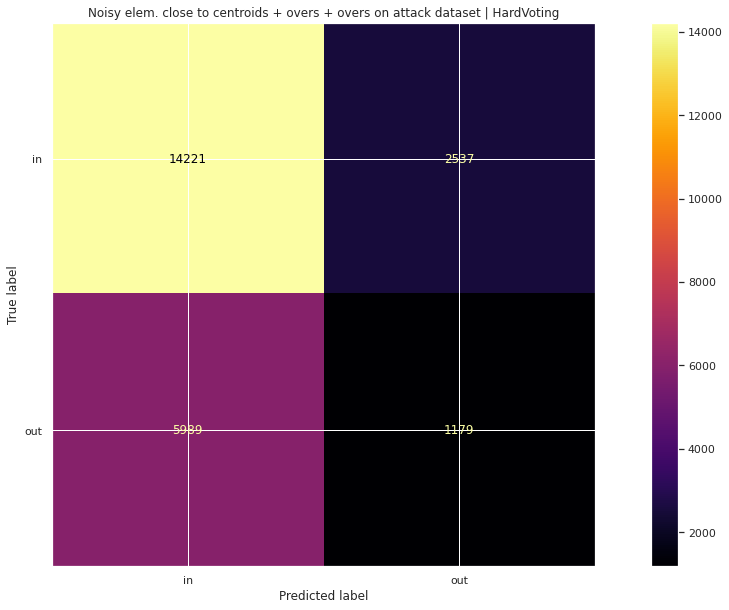

In [14]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(adult_train, adult_test, ensemble_0, ensemble_1, black_box, "Noisy elem. close to centroids + overs + overs on attack dataset | HardVoting")

# Dataset Generated With the Gaussian Mixtures

### Without oversampling

In [15]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/ADULT_STATISTICAL_NO_OVERSAMPLING_AFTER_GEN_2_NO_ATK_OVERS/gaussian/same"

#even = 2 IN - 1 OUT
Statistical no overs, no grid | HardVoting
              precision    recall  f1-score   support

          in       0.70      0.88      0.78     16875
         out       0.33      0.14      0.20      7233

    accuracy                           0.66     24108
   macro avg       0.51      0.51      0.49     24108
weighted avg       0.59      0.66      0.61     24108



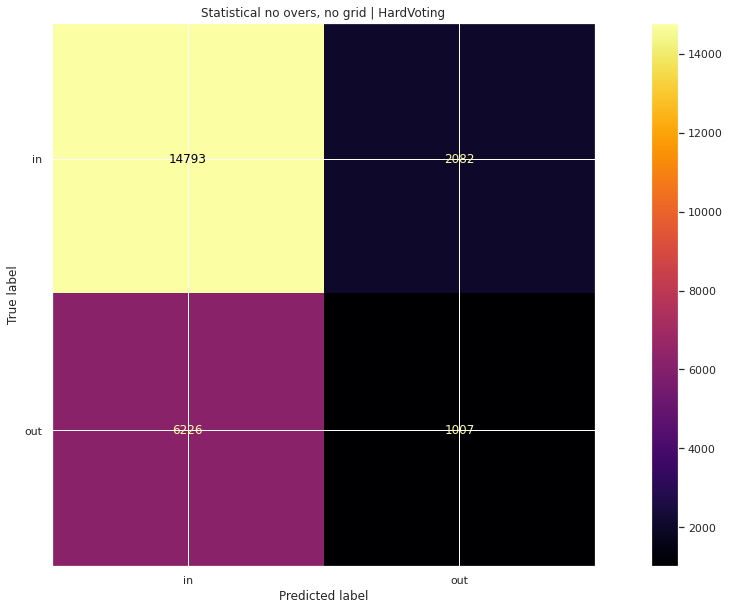

In [16]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(adult_train, adult_test, ensemble_0, ensemble_1, black_box, "Statistical no overs, no grid | HardVoting")

# Dataset Generated With the Gaussian Mixtures with gridsearch for n_components and oversampling of the attack dataset

> Il codice termina in modo anomalo a causa di SMOTE che utilizza troppa ram e il sistema operativo uccide il processo.

> Da StackOverflow: Basically, if you make SMOTE generate more samples that you have RAM, there is nothing that we can do. You might want    to tune the sampling_strategy to limit the number of samples to create.

> TODO: far generare il minimo numero di elementi possibile a SMOTE

> TODO: capire perchè su diva non succede.

In [17]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/12_AGO/ADULT_STATISTICAL_OVERSAMPLING_AFTER_GEN_AND_ATTACK_OVERS/gaussian/same/"

In [18]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(adult_train, adult_test, ensemble_0, ensemble_1, black_box, "Statistical no overs, no grid | HardVoting")

AssertionError: 